# Introduction

Have you ever wondered why some coutries econmic growth is faster than other? Well I have and in my project I am building a classification model that predicts whether a country is experiencing slow, moderate, or fast economic growth. A countries econmic growth can be from many different factors such as inflation, unemployment, debt, and GDP per person. Hopefully from this project we can analyis if slow, moderate, and fast growth coutries share certain economic indicators that makes them grow at the speed they are growing. 

Main Questions: 
- What are most coutries econmic growth rate?
- Why do some contries have faster econmic growth than other?
- What is making the slower econmic growth countries grow slowly?

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

installing scikit-learn for the modeling

In [4]:
!pip install scikit-learn

In [5]:
import sklearn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
print(sklearn.__version__)


1.7.2


In [6]:
table1 = pd.read_csv(r"C:\Users\jesss\OneDrive\Documents\GitHub\ITCS3162\world_economics.csv")

In [7]:
table1.head()

,name,currency,capital,languages,latitude,longitude,area,region,subregion,borders,GDP,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Tunisia,Tunisian dinar,Tunis,Arabic,34.000000,9.000000,163610.0,Africa,Northern Africa,"['DZA', 'LBY']",53,1.80,7.5,5.30,15.70,-6.6,79.8,-2.7,11.89
1,Vietnam,Vietnamese đồng,Hanoi,Vietnamese,16.166667,107.833333,331212.0,Asia,South-Eastern Asia,"['KHM', 'CHN', 'LAO']",476,6.88,4.5,3.19,2.24,-4.0,32.9,6.1,101.30
2,Ecuador,United States dollar,Quito,Spanish,-2.000000,-77.500000,276841.0,Americas,South America,"['COL', 'PER']",125,3.46,8.5,0.72,4.50,-1.9,50.6,2.8,17.97
3,Puerto Rico,United States dollar,San Juan,English,18.250000,-66.500000,8870.0,Americas,Caribbean,NaN,126,NaN,NaN,1.20,5.70,NaN,NaN,NaN,3.20
4,United States,United States dollar,"Washington, D.C.",English,38.000000,-97.000000,9372610.0,Americas,North America,"['CAN', 'MEX']",29185,3.00,4.5,2.70,4.20,-6.4,124.3,-3.9,341.15


# Pre-processing the dataset

The goal of me pre-processing my data is to first fill in missing values with median, then I created a GDP per capita using the GDP in the billions and population in the millions. I created a growth_class from GDP Growth and labeled them into categories (slow: less than 2%, moderate: between 2-5%, fast: over 5%). Lastly I dropped any colunms that were not useful for this projects modeling because it is not needed. 

In [8]:
table1.fillna(table1.median(numeric_only=True), inplace=True)

table1["GDP_per_capita"] = (table1["GDP"] * 1e9) / (table1["Population"] * 1e6)

table1["growth_class"] = pd.cut(
    table1["GDP Growth"],
    bins=[-100, 2, 5, 100],
    labels=["Slow", "Moderate", "Fast"]
)

drop_cols = ["name","currency","capital","languages","region","subregion","borders"]
table_model = table1.drop(columns=drop_cols, errors="ignore")


In [9]:
table1.head()

,name,currency,capital,languages,latitude,longitude,area,region,subregion,borders,...,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population,GDP_per_capita,growth_class
0,Tunisia,Tunisian dinar,Tunis,Arabic,34.000000,9.000000,163610.0,Africa,Northern Africa,"['DZA', 'LBY']",...,1.80,7.50,5.30,15.70,-6.600,79.8,-2.7,11.89,4457.527334,Slow
1,Vietnam,Vietnamese đồng,Hanoi,Vietnamese,16.166667,107.833333,331212.0,Asia,South-Eastern Asia,"['KHM', 'CHN', 'LAO']",...,6.88,4.50,3.19,2.24,-4.000,32.9,6.1,101.30,4698.914116,Fast
2,Ecuador,United States dollar,Quito,Spanish,-2.000000,-77.500000,276841.0,Americas,South America,"['COL', 'PER']",...,3.46,8.50,0.72,4.50,-1.900,50.6,2.8,17.97,6956.037841,Moderate
3,Puerto Rico,United States dollar,San Juan,English,18.250000,-66.500000,8870.0,Americas,Caribbean,NaN,...,0.70,5.25,1.20,5.70,-3.175,54.9,-1.0,3.20,39375.000000,Slow
4,United States,United States dollar,"Washington, D.C.",English,38.000000,-97.000000,9372610.0,Americas,North America,"['CAN', 'MEX']",...,3.00,4.50,2.70,4.20,-6.400,124.3,-3.9,341.15,85548.878792,Moderate


In [10]:
table1.describe

<bound method NDFrame.describe of               name              currency           capital   languages  \
0          Tunisia        Tunisian dinar             Tunis      Arabic   
1          Vietnam       Vietnamese đồng             Hanoi  Vietnamese   
2          Ecuador  United States dollar             Quito     Spanish   
3      Puerto Rico  United States dollar          San Juan     English   
4    United States  United States dollar  Washington, D.C.     English   
..             ...                   ...               ...         ...   
168  New Caledonia             CFP franc            Nouméa      French   
169         Kosovo                  Euro          Pristina    Albanian   
170       Malaysia     Malaysian ringgit      Kuala Lumpur     English   
171           Fiji         Fijian dollar              Suva     English   
172        Jamaica       Jamaican dollar          Kingston     English   

      latitude   longitude       area    region           subregion  \
0    3

# Introducing the data

name: The name of the country

currency: The currency used in that country

capital: The capital city of that country

languages: The primary language(s) spoken in the country

latitude: Geographic coordinate specifying how far north a country lies.

longitude: Geographic coordinate specifying how far east or west a country lies.

area: The land area of the country

region: The geographical region 

subregion: A more specific regional grouping

borders: A list of neighboring countries

GDP: Gross Domestic Product

GDP Growth: Annual percentage change in GDP, measuring the economic growth rate

Interest Rate: The central bank’s interest rate, which influences the country's borrowing and lending

Inflation Rate: A percentage increase in the general price level of goods and services

Jobless Rate: The unemployment rate

Gov. Budget: Government financial balance as a percentage of GDP

Debt/GDP: The ratio of a country’s national debt to its GDP

Current Account: Balance of payments measure

Population: The total population of the country


The ones made while pre-processing my data

GDP_per_capita: GDP divided by population

income_class: A categorize that puts countries into Low, Medium, or High income groups based on GDP per capita.

# Data Understanding/Visualization

# Visual One: Growth Class Distribution

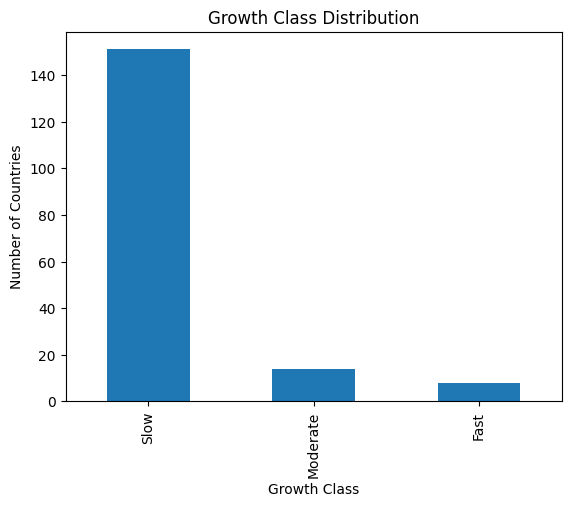

In [11]:
table1["growth_class"].value_counts().plot(kind="bar")
plt.title("Growth Class Distribution")
plt.xlabel("Growth Class")
plt.ylabel("Number of Countries")
plt.show()


For my first visualization I made a simple bar chart to demonstrate growth class distribution for all the countries in the dataset I am using. As you can see in the visual most of the coutries are growing slowly, which answers my first question asking "What are most coutries econmic growth rate?".

# Visual Two: GDP per capita vs Inflation sorted by Growth Class

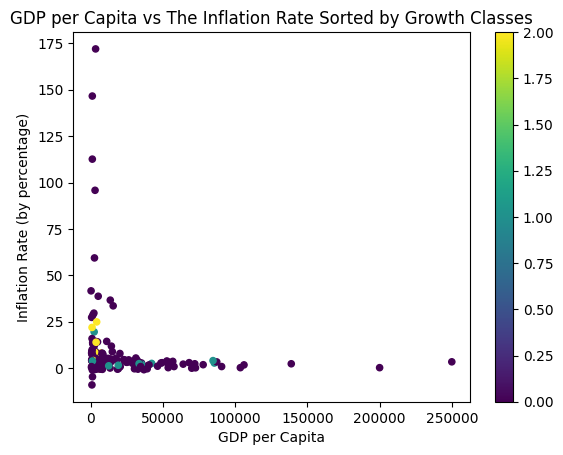

In [13]:
table1.plot(
    x="GDP_per_capita",
    y="Inflation Rate",
    kind="scatter",
    c=table1["growth_class"].cat.codes,
    colormap="viridis"
)
plt.title("GDP per Capita vs The Inflation Rate " \
"Sorted by Growth Classes")
plt.xlabel("GDP per Capita")
plt.ylabel("Inflation Rate (by percentage)")
plt.show()



For my second visual I went more into detail showing the GDP per capita vs the inflation rate sorted by the growth classes. This visual help shows whether fast-growing countries are clustered by wealth and inflation or not. Using coloring the lighter the color symbolizes fast growing economies and the darker color means slower growing economies. From looking at this visual you can see a correlation between slow growing economies and an high inflation rates. 

# Model: Random forest 

for this project I am using the random forest model for my dataset. I chose this model because random forest would work best with my dataset, this is because I have a relativly small dataset consisting of 173 rows and 19 colummns. My dataset also has categorical variables which works very will with the random forest model. 

In [7]:
table1.shape

(173, 19)

Random Forest Accuracy: 1.0


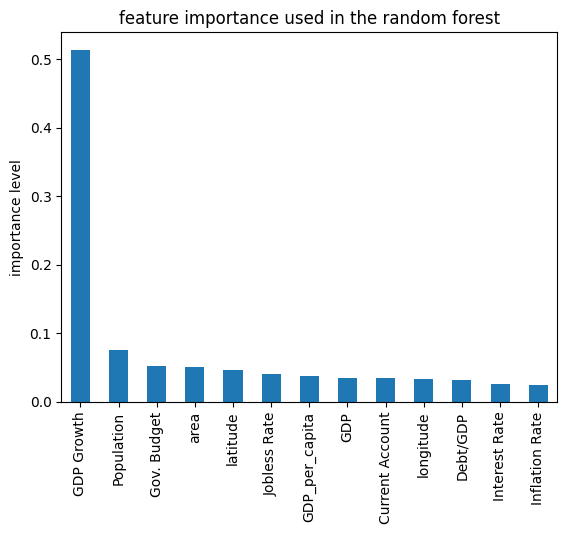

In [70]:
X = table_model.drop(columns=["growth_class"])
y = table_model["growth_class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ranf_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranf_model.fit(X_train, y_train)

y_pred = ranf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

pd.Series(ranf_model.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind="bar")
plt.title("feature importance used in the random forest")
plt.ylabel("importance level")
plt.show()


What I did for my random forest model is I trained 100 decision trees using the dataset. Each tree should makes a guess on which growth category a country belongs to  based on its economic indicators (GDP, inflation, etc), then the forest will takes a vote. This is supposed to makes the predictions more accurate and less biased than using just one tree.

Pros: 
- More accurate because it combines 100 trees
- Works well with lots of features

Cons: 
- Harder to understand

# Model: Decision Tree

In this project, I used a decision tree because it is simple and provides clear decision rules, making it easy to understand how economic indicators relate to growth classes.

 Accuracy: 1.0
              precision    recall  f1-score   support

    Moderate       1.00      1.00      1.00         1
        Slow       1.00      1.00      1.00        34

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



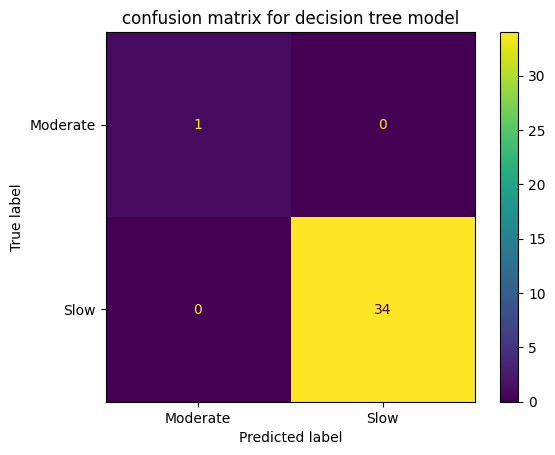

In [ ]:
table1_model = DecisionTreeClassifier(max_depth=3, random_state=42)
table1_model.fit(X_train, y_train)

y_pred_table1 = table1_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_table1))
print(classification_report(y_test, y_pred_table1))

ConfusionMatrixDisplay.from_estimator(table1_model, X_test, y_test)
plt.title("confusion matrix for decision tree model")
plt.show()

In my decision tree what I did was trained a single decision tree that asks yes and no questions about econmic growth factors like GDP or inflation until it picks a growth class. 

Pros: 
- Easy to understand

Cons: 
- It is less accurate than random forest
- only uses one tree, so not good for a big picture

# Evaluation 

For this project I trained and tested two models, the first one being random forest and then I used decision tree. In both the random forest and decision tree, it received an accuracy percentage of 100%. I used accuracy as one of my metric since it is a simple way to measure overall performance across the three growth classes (slow, moderate, fast). For the decision tree model I evaluated it with a confusion matrix and classification report, which showed where the model struggled to separate classes. In the random rorest model I focused on which features were most important for predicting growth, with one variable (GDP growth) standing out. Overall, the random forest performed better, but the Decision Tree was easier to interpret. Together, they show both the performance and reasoning behind the classifications.

# Storytelling

For this project, I chose a dataset about global economic indicators to see what countries would be classified into a slow, moderate, or fast growth categories. I did this because I wanted to see what makes some countries' economic growth faster than others, and if there are some economic indicators they share. For my first visual, I showed the distribution of growth classes. This is visual shows how many countries fall into each group, providing a big-picture view before analysing more. The second chart compares GDP per capita and inflation rates, with the percentages colored by growth class. This shows that fast-growth countries often have higher GDP per capita and stable inflation, while slow-growth countries tend to face higher inflation rates. After the visuals, I trained a random forest model to identify important predictors like GDP growth and population size. The model had a high accuracy, demonstrating that these indicators can be noticed between different growth categories. I also used a decision tree model to provide a simpler structure that shows how factors like GDP growth and population are important to classify a country. Overall, my project suggests that factors like stable inflation and increasing income levels correlate with faster economic growth. 

# Impact Section

The Impact my project is to inform the public about the worlds econmic growth rate. I wanted to show how some factors like high inflation or unemployment can create a big impact on a countries econmic growth rate. My project could cause harm by having misleading data or missing data leading to incorrect information. Overall I hope my project can be helpful for the countries with a slow econmic growth rate so they can compare to the countries with a fast econmic growth rate. 